In [ ]:
# loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller as adft
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
import matplotlib.pylab as plt
from datetime import datetime
from matplotlib.pylab import rcParams
!pip install pmdarima --quiet
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.4 MB/s eta 0:00:00


In [ ]:
from itertools import product
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving femsa_ts_data.csv to femsa_ts_data.csv


In [ ]:
ts_data = pd.read_csv('femsa_ts_data.csv')

We import the database and briefly visualize the info on the columns

In [ ]:

print(ts_data.head())


      date  mexico_cgdp_13  unemployment_rate  exchange_rate  mexicp_ipc  \
0  2005/01     13354787.87              0.036        11.1427    12676.90   
1  2005/02     14104833.95              0.035        10.8228    13486.13   
2  2005/03     13782144.44              0.036        10.7775    16120.08   
3  2005/04     14306523.82              0.028        10.6295    17802.71   
4  2006/01     14107960.02              0.033        10.7468    19272.63   

   inflation_rate  consumer_sentimenta  consumer_sentimentb  femsa_stock  \
0          0.0079            42.224863            41.707724    14.580819   
1          0.0080            40.897975            41.089681    16.674393   
2          0.0172            41.647061            41.910801    19.537094   
3          0.0333            43.632906            43.633310    20.041512   
4          0.0087            44.897111            44.508168    25.857916   

        igae  
0  83.626395  
1  86.352087  
2  84.642560  
3  89.151098  
4  89.54008

In [ ]:
print(ts_data.isnull().sum())


date                   0
mexico_cgdp_13         0
unemployment_rate      0
exchange_rate          0
mexicp_ipc             0
inflation_rate         0
consumer_sentimenta    0
consumer_sentimentb    0
femsa_stock            0
igae                   0
dtype: int64


Let's index all variables with date

In [ ]:
ts_data.index = ts_data['date']
del ts_data['date']
print(ts_data.head())

         mexico_cgdp_13  unemployment_rate  exchange_rate  mexicp_ipc  \
date                                                                    
2005/01     13354787.87              0.036        11.1427    12676.90   
2005/02     14104833.95              0.035        10.8228    13486.13   
2005/03     13782144.44              0.036        10.7775    16120.08   
2005/04     14306523.82              0.028        10.6295    17802.71   
2006/01     14107960.02              0.033        10.7468    19272.63   

         inflation_rate  consumer_sentimenta  consumer_sentimentb  \
date                                                                
2005/01          0.0079            42.224863            41.707724   
2005/02          0.0080            40.897975            41.089681   
2005/03          0.0172            41.647061            41.910801   
2005/04          0.0333            43.632906            43.633310   
2006/01          0.0087            44.897111            44.508168   

    

# **A.** Background

For this Assignment we will be using México's Monthly IPC

In [ ]:
descriptive_stats = ts_data['mexicp_ipc'].describe()
print("Descriptive Statistics for 'mexicp_ipc':\n", descriptive_stats)


Descriptive Statistics for 'mexicp_ipc':
 count       66.000000
mean     36819.469697
std      10032.429111
min      12676.900000
25%      30450.390000
50%      40192.390000
75%      43981.355000
max      50346.060000
Name: mexicp_ipc, dtype: float64


We notice there is a quite big std wich indicates the values are changing a lot over time and go from min 10,032 to max 50,346 in the time series

# **B.** Visualization

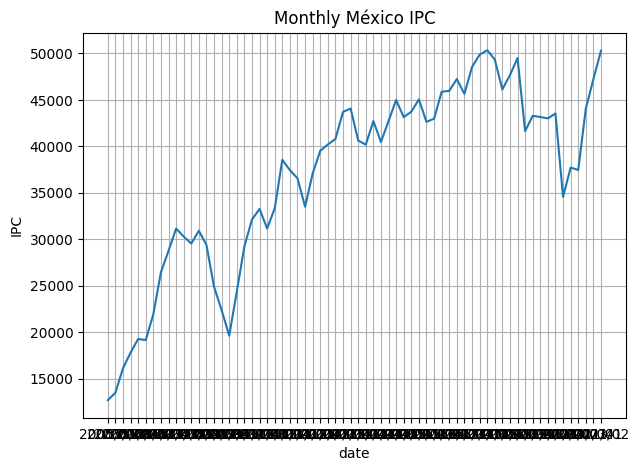

In [ ]:
# Time Series Line Plot

plt.figure(figsize=(7, 5))
plt.plot(ts_data.index, ts_data['mexicp_ipc'])
plt.xlabel('date')
plt.ylabel('IPC')
plt.title('Monthly México IPC')
plt.grid(True)
plt.show()

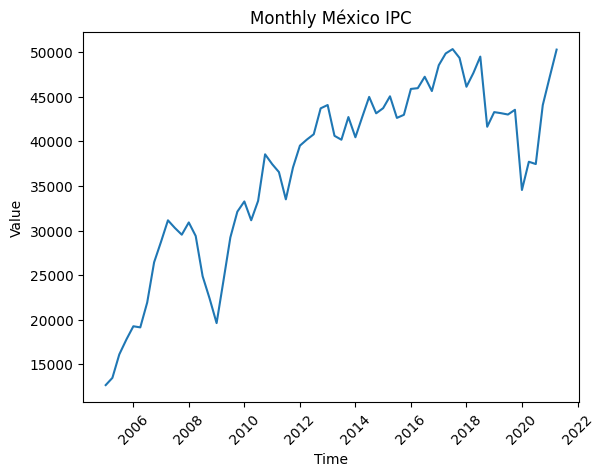

In [ ]:
# Time Series Plot
date_range = pd.date_range('2005-01-01', '2021-06-01', freq='BQS')
fsp = ts_data['mexicp_ipc']
data = {'date': date_range, 'mexicp_ipc': fsp}

# Create a new DataFrame using the 'data' dictionary
df = pd.DataFrame(data)

# Create the plot
plt.plot(df['date'], df['mexicp_ipc'], linestyle = 'solid')

# Add title and axis labels
plt.title('Monthly México IPC')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

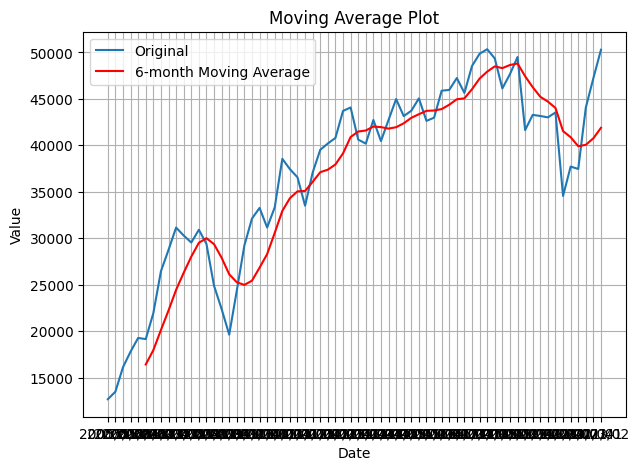

In [ ]:
# Lets estimate a 6 months moving average plot
# By estimating a moving average we can display a forecast
plt.figure(figsize=(7, 5))
values = ts_data['mexicp_ipc']

rolling_mean = values.rolling(window=6).mean()
plt.plot(values, label='Original')
plt.plot(rolling_mean, label='6-month Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Moving Average Plot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Time series data decomposition
ts_dataa = pd.read_csv('femsa_ts_data.csv')
ts_dataa = pd.DataFrame(ts_dataa)
ts_dataa.set_index('date', inplace=True)
print(ts_dataa.head())

         mexico_cgdp_13  unemployment_rate  exchange_rate  mexicp_ipc  \
date                                                                    
2005/01     13354787.87              0.036        11.1427    12676.90   
2005/02     14104833.95              0.035        10.8228    13486.13   
2005/03     13782144.44              0.036        10.7775    16120.08   
2005/04     14306523.82              0.028        10.6295    17802.71   
2006/01     14107960.02              0.033        10.7468    19272.63   

         inflation_rate  consumer_sentimenta  consumer_sentimentb  \
date                                                                
2005/01          0.0079            42.224863            41.707724   
2005/02          0.0080            40.897975            41.089681   
2005/03          0.0172            41.647061            41.910801   
2005/04          0.0333            43.632906            43.633310   
2006/01          0.0087            44.897111            44.508168   

    

In [ ]:
ts_decomposition = seasonal_decompose(ts_dataa['mexicp_ipc'], model='additive', period=4) # Pass ts_dataa directly to seasonal_decompose

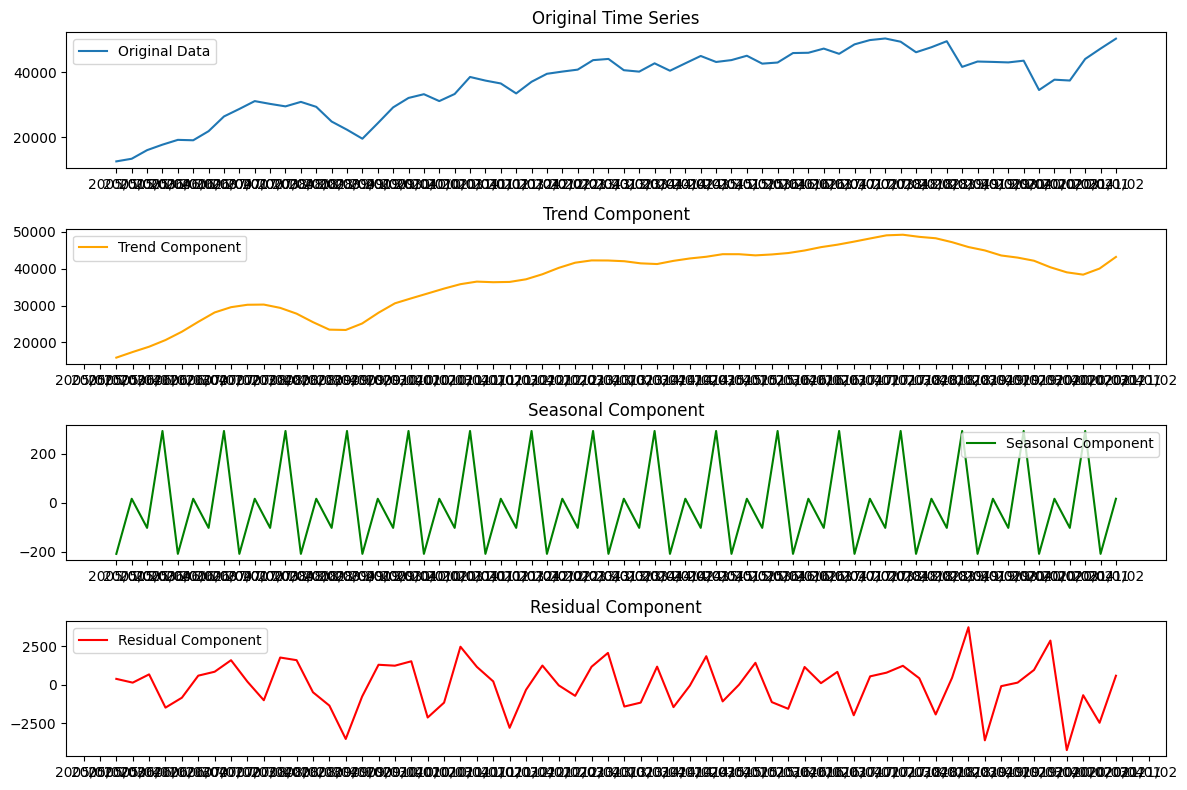

In [ ]:
# Plotting time series data decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(ts_dataa['mexicp_ipc'], label='Original Data')
plt.title('Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(ts_decomposition.trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(ts_decomposition.seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(ts_decomposition.resid, label='Residual Component', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

The time series show a clear trend and seasonality analyzing the seasonal component and visualizing a clear pattern

# **C.** Estimation

In [ ]:
# Augment Dickey Fuller Test - Stationary Test
# H0: Time series is non-stationary. That is, the time series data has some time-dependent structure and does not have constant variance over time.
# H1: Time series is stationary
adf_test = adft(ts_data['mexicp_ipc'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.090289
p-value: 0.248437


We notice that the original time series shows no stationarity

<Figure size 700x500 with 0 Axes>

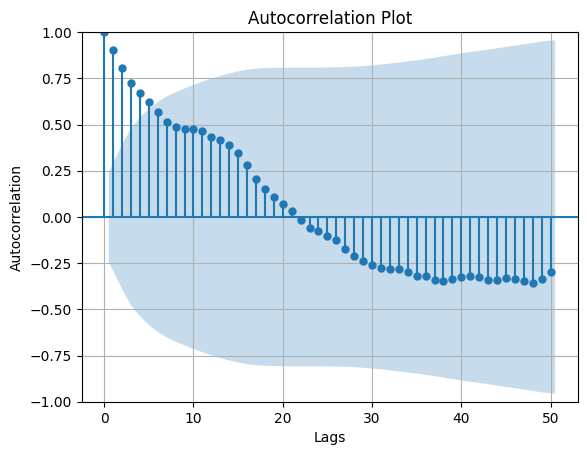

In [ ]:
# Autocorrelation Plot
plt.figure(figsize=(7,5))
plot_acf(ts_data['mexicp_ipc'], lags=50)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.grid(True)
plt.show()

The time series also shows autocorrelation

# Model selection

<Axes: xlabel='date'>

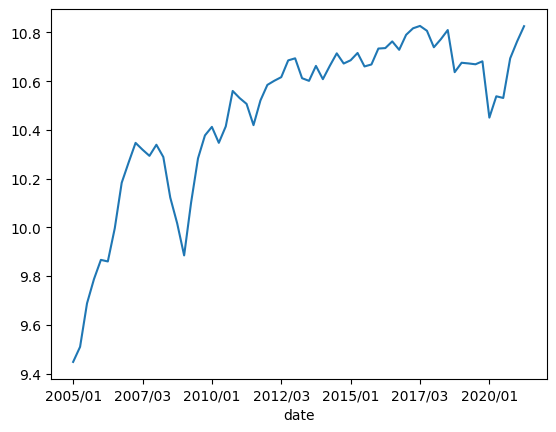

In [ ]:
ts_data['log_mexicp_ipc'] = np.log(ts_data['mexicp_ipc'])
ts_data['log_mexicp_ipc'].plot()

In [ ]:
# Augment Dickey Fuller Test - Stationary Test
# Log Transformation
log_adf_test = adft(np.log(ts_data['mexicp_ipc']))
print('ADF Statistic: %f' % log_adf_test[0])
print('p-value: %f' % log_adf_test[1])

ADF Statistic: -3.279647
p-value: 0.015813


Text(0.5, 1.0, 'Differences Monthly México IPC')

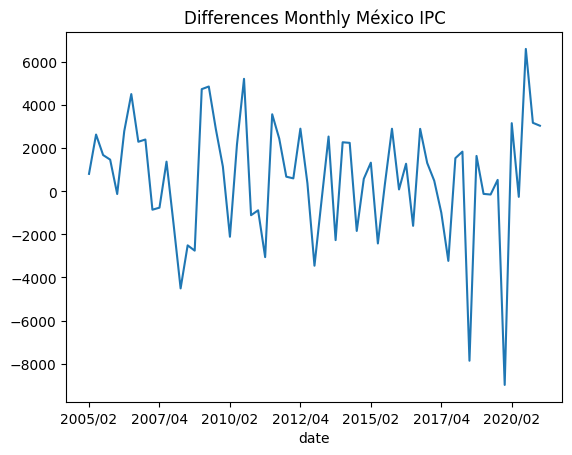

In [ ]:
### Making a Time Series Stationary
### Difference transformation
ts_data['mexicp_ipc_diff'] = ts_data['mexicp_ipc'] - ts_data['mexicp_ipc'].shift(1)
ts_data['mexicp_ipc_diff'].dropna().plot()
plt.title('Differences Monthly México IPC')

In [ ]:
# ts_data["femsa_stock_diff"] = ts_data["femsa_stock"] - ts_data["femsa_stock"].shift(1)
# ts_data.head()
diff_adf_test = adft(ts_data["mexicp_ipc_diff"].dropna())
print('ADF Statistic: %f' % diff_adf_test[0])
print('p-value: %f' % diff_adf_test[1])

ADF Statistic: -7.491805
p-value: 0.000000


Text(0.5, 1.0, 'Log Differences Monthly México IPC')

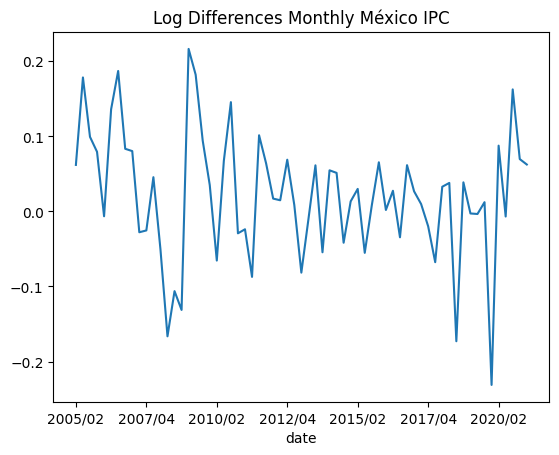

In [ ]:
ts_data['log_diff_mexicp_ipc'] = ts_data['log_mexicp_ipc'] - ts_data['log_mexicp_ipc'].shift(1)
ts_data['log_diff_mexicp_ipc'].dropna().plot()
ts_data.head()
plt.title('Log Differences Monthly México IPC')

In [ ]:
# Augment Dickey Fuller Test - Stationary Test
# Log Diff Transformation
log_diff_adf_test = adft(ts_data["log_diff_mexicp_ipc"].dropna())
print('ADF Statistic: %f' % log_diff_adf_test[0])
print('p-value: %f' % log_diff_adf_test[1])

ADF Statistic: -4.230341
p-value: 0.000585


In [ ]:

ipc = ts_data['log_mexicp_ipc']

# Fit an ARMA model using SARIMAX (equivalent to ARMA(p, q) when d=0)
mod_arma = sm.tsa.SARIMAX(ipc, order=(1, 0, 1), enforce_stationarity=False, enforce_invertibility=False)
results_arma = mod_arma.fit()

# Print the summary of the ARMA model
print(results_arma.summary())
predictions = results_arma.predict(start=0, end=len(ipc) - 1)

# Combine predictions and actual data into a DataFrame to align them
df_results = pd.DataFrame({'Actual': ipc, 'Predicted': predictions})

# Drop NaN values
df_results = df_results.dropna()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df_results['Actual'], df_results['Predicted']))

# Print RMSE
print(f"\nRMSE of the ARMA(1, 1) model: {rmse:.4f}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency info

                               SARIMAX Results                                
Dep. Variable:         log_mexicp_ipc   No. Observations:                   66
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  67.372
Date:                Thu, 05 Sep 2024   AIC                           -128.743
Time:                        03:28:02   BIC                           -122.266
Sample:                             0   HQIC                          -126.192
                                 - 66                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0019      0.001    812.690      0.000       0.999       1.004
ma.L1          0.1811      0.114      1.590      0.112      -0.042       0.404
sigma2         0.0071      0.001      6.541      0.0

ARMA

In [ ]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Define the time series data
ipc = ts_data['log_mexicp_ipc']

# Check for NaN values and handle them
if ipc.isnull().sum() > 0:
    print("Data contains NaN values. Removing or imputing NaNs.")
    ipc = ipc.dropna()  # You can also use ipc.fillna(method='ffill') or other methods

# Prepare lists to store results
aic_values = []
rmse_values = []
models = []

# Loop over possible ARMA model combinations
for p in range(1, 6):
    for q in range(1, 6):
        try:
            # Fit the SARIMAX model as ARMA (p, 0, q)
            model = sm.tsa.SARIMAX(ipc, order=(p, 0, q), enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=False)

            # Calculate AIC
            aic = results.aic
            aic_values.append((p, q, aic))

            # Calculate RMSE
            predictions = results.predict(start=0, end=len(ipc) - 1)
            rmse = np.sqrt(mean_squared_error(ipc.dropna(), predictions.dropna()))
            rmse_values.append((p, q, rmse))

            # Store model details
            models.append((p, q, results))

        except Exception as e:
            # Handle potential errors in model fitting
            print(f"Model ({p},{q}) could not be fit due to error: {e}")

# Ensure there are valid models to compare
if aic_values and rmse_values:
    # Find model with lowest AIC
    best_aic_model = min(aic_values, key=lambda x: x[2])
    best_aic_order = (best_aic_model[0], best_aic_model[1])

    # Find model with lowest RMSE
    best_rmse_model = min(rmse_values, key=lambda x: x[2])
    best_rmse_order = (best_rmse_model[0], best_rmse_model[1])

    # Check if the model with lowest AIC is the same as the model with the lowest RMSE
    if best_aic_order == best_rmse_order:
        best_combined_model_order = best_aic_order
    else:
        best_combined_model_order = None

    # Output results
    print(f"Model with the lowest AIC: Order (p, q) = {best_aic_order}, AIC = {best_aic_model[2]}")
    print(f"Model with the lowest RMSE: Order (p, q) = {best_rmse_order}, RMSE = {best_rmse_model[2]}")

    if best_combined_model_order:
        print(f"Model with both lowest AIC and RMSE: Order (p, q) = {best_combined_model_order}")
    else:
        print("No single model has both the lowest AIC and RMSE.")

    # Print summary of the best models
    for (p, q, model) in models:
        if (p, q) == best_aic_order:
            print("\nSummary of the best model based on AIC:")
            print(model.summary())
            # Print RMSE for the best AIC model
            corresponding_rmse = [rmse for (a, b, rmse) in rmse_values if (a, b) == best_aic_order][0]
            print(f"RMSE of the best model based on AIC: {corresponding_rmse:.4f}")

        if (p, q) == best_rmse_order:
            print("\nSummary of the best model based on RMSE:")
            print(model.summary())
            # Print RMSE for the best RMSE model
            corresponding_rmse = [rmse for (a, b, rmse) in rmse_values if (a, b) == best_rmse_order][0]
            print(f"RMSE of the best model based on RMSE: {corresponding_rmse:.4f}")

        if best_combined_model_order and (p, q) == best_combined_model_order:
            print("\nSummary of the best model based on both AIC and RMSE:")
            print(model.summary())
            # Print RMSE for the model with both best AIC and RMSE
            corresponding_rmse = [rmse for (a, b, rmse) in rmse_values if (a, b) == best_combined_model_order][0]
            print(f"RMSE of the best model based on both AIC and RMSE: {corresponding_rmse:.4f}")

else:
    print("No valid models could be fit to the data.")

Model with the lowest AIC: Order (p, q) = (2, 1), AIC = -132.74078995405637
Model with the lowest RMSE: Order (p, q) = (1, 4), RMSE = 1.1656212770955137
No single model has both the lowest AIC and RMSE.

Summary of the best model based on RMSE:
                               SARIMAX Results                                
Dep. Variable:         log_mexicp_ipc   No. Observations:                   66
Model:               SARIMAX(1, 0, 4)   Log Likelihood                  69.042
Date:                Thu, 05 Sep 2024   AIC                           -126.084
Time:                        03:28:11   BIC                           -113.418
Sample:                             0   HQIC                          -121.120
                                 - 66                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

ARIMA

In [ ]:

# Suppress warnings
warnings.filterwarnings("ignore")

# Define the time series data (non-log transformed)
ipc = ts_data['mexicp_ipc']

# Check for NaN values and handle them
if ipc.isnull().sum() > 0:
    print("Data contains NaN values. Removing or imputing NaNs.")
    ipc = ipc.dropna()  # You can also use ipc.fillna(method='ffill') or other methods

# Prepare lists to store results
aic_values = []
rmse_values = []
models = []

# Loop over possible ARIMA model combinations
for p in range(1, 6):
    for d in range(0, 3):  # d goes from 0 to 2
        for q in range(1, 6):
            try:
                # Fit the SARIMAX model as ARIMA (p, d, q)
                model = sm.tsa.SARIMAX(ipc, order=(p, d, q), enforce_stationarity=False, enforce_invertibility=False)
                results = model.fit(disp=False)

                # Calculate AIC
                aic = results.aic
                aic_values.append((p, d, q, aic))

                # Calculate RMSE
                predictions = results.predict(start=0, end=len(ipc) - 1)
                df_results = pd.DataFrame({'Actual': ipc, 'Predicted': predictions})
                df_results = df_results.dropna()

                rmse = np.sqrt(mean_squared_error(df_results['Actual'], df_results['Predicted']))
                rmse_values.append((p, d, q, rmse))

                # Store model details
                models.append((p, d, q, results))

            except Exception as e:
                # Handle potential errors in model fitting
                print(f"Model ({p},{d},{q}) could not be fit due to error: {e}")

# Ensure there are valid models to compare
if aic_values and rmse_values:
    # Find model with lowest AIC
    best_aic_model = min(aic_values, key=lambda x: x[3])
    best_aic_order = (best_aic_model[0], best_aic_model[1], best_aic_model[2])

    # Find model with lowest RMSE
    best_rmse_model = min(rmse_values, key=lambda x: x[3])
    best_rmse_order = (best_rmse_model[0], best_rmse_model[1], best_rmse_model[2])

    # Check if the model with lowest AIC is the same as the model with the lowest RMSE
    if best_aic_order == best_rmse_order:
        best_combined_model_order = best_aic_order
    else:
        best_combined_model_order = None

    # Output results
    print(f"Model with the lowest AIC: Order (p, d, q) = {best_aic_order}, AIC = {best_aic_model[3]}")
    print(f"Model with the lowest RMSE: Order (p, d, q) = {best_rmse_order}, RMSE = {best_rmse_model[3]}")

    if best_combined_model_order:
        print(f"Model with both lowest AIC and RMSE: Order (p, d, q) = {best_combined_model_order}")
    else:
        print("No single model has both the lowest AIC and RMSE.")

    # Print summary of the best models
    for (p, d, q, model) in models:
        if (p, d, q) == best_aic_order:
            print("\nSummary of the best model based on AIC:")
            print(model.summary())
            # Print RMSE for the best AIC model
            corresponding_rmse = [rmse for (a, b, c, rmse) in rmse_values if (a, b, c) == best_aic_order][0]
            print(f"RMSE of the best model based on AIC: {corresponding_rmse:.4f}")

        if (p, d, q) == best_rmse_order:
            print("\nSummary of the best model based on RMSE:")
            print(model.summary())
            # Print RMSE for the best RMSE model
            corresponding_rmse = [rmse for (a, b, c, rmse) in rmse_values if (a, b, c) == best_rmse_order][0]
            print(f"RMSE of the best model based on RMSE: {corresponding_rmse:.4f}")

        if best_combined_model_order and (p, d, q) == best_combined_model_order:
            print("\nSummary of the best model based on both AIC and RMSE:")
            print(model.summary())
            # Print RMSE for the model with both best AIC and RMSE
            corresponding_rmse = [rmse for (a, b, c, rmse) in rmse_values if (a, b, c) == best_combined_model_order][0]
            print(f"RMSE of the best model based on both AIC and RMSE: {corresponding_rmse:.4f}")

else:
    print("No valid models could be fit to the data.")

Model with the lowest AIC: Order (p, d, q) = (1, 2, 5), AIC = 1104.030558986105
Model with the lowest RMSE: Order (p, d, q) = (5, 1, 5), RMSE = 2954.7709284683915
No single model has both the lowest AIC and RMSE.

Summary of the best model based on AIC:
                               SARIMAX Results                                
Dep. Variable:             mexicp_ipc   No. Observations:                   66
Model:               SARIMAX(1, 2, 5)   Log Likelihood                -545.015
Date:                Thu, 05 Sep 2024   AIC                           1104.031
Time:                        03:28:22   BIC                           1118.454
Sample:                             0   HQIC                          1109.649
                                 - 66                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

# **D.** Evaluation

**Based on diagnostic tests and RMSE and / or AIC, compare the 3
estimated time series regression models from Assignment 3 and the
estimated VAR model results, and select the time series model that
better fits the data to estimate the forecast.**

In [ ]:
### ARIMA Forecasting
ipc = ts_data['mexicp_ipc']
mod = sm.tsa.statespace.SARIMAX(ipc, order=(5, 1, 5), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             mexicp_ipc   No. Observations:                   66
Model:               SARIMAX(5, 1, 5)   Log Likelihood                -547.762
Date:                Thu, 05 Sep 2024   AIC                           1117.525
Time:                        03:28:23   BIC                           1140.378
Sample:                             0   HQIC                          1126.446
                                 - 66                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6720      0.092      7.319      0.000       0.492       0.852
ar.L2         -0.5167      0.123     -4.188      0.000      -0.759      -0.275
ar.L3          0.4442      0.123      3.618      0.0

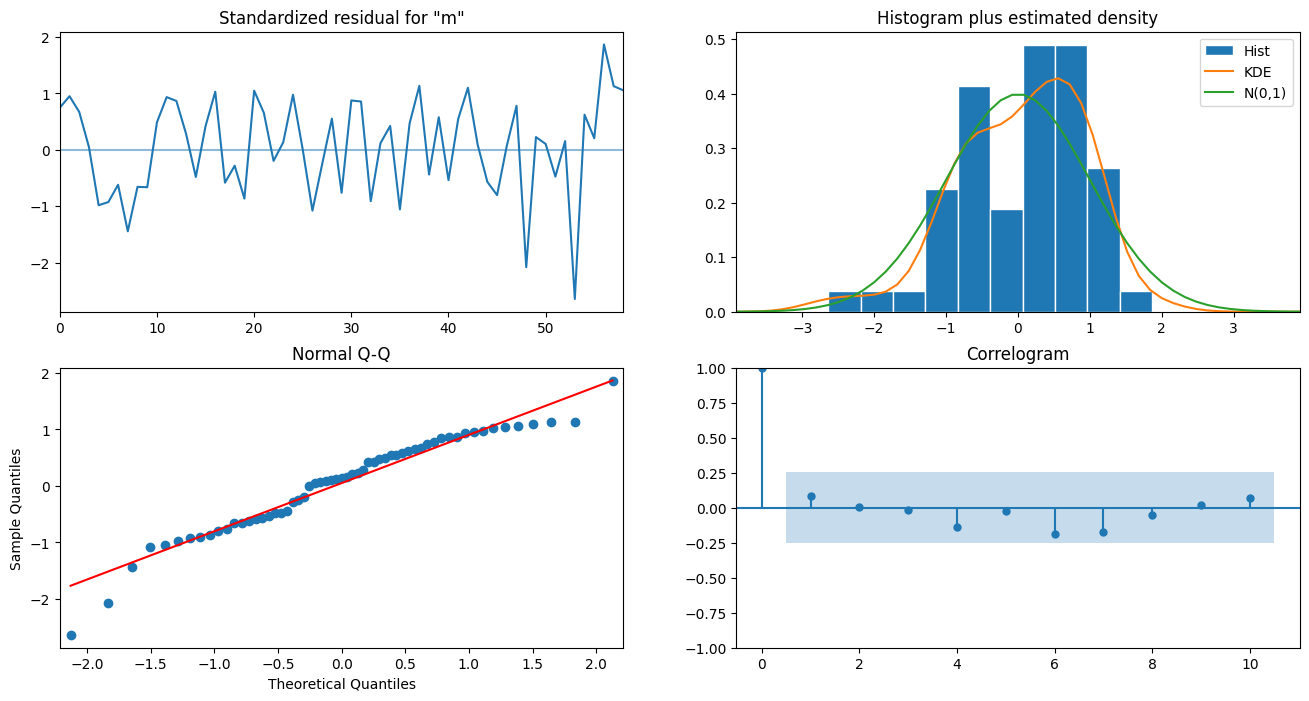

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# **E.** Forecast

**By using the selected model, make a forecast for the next 6 periods. In
doing so, include a time series plot showing your forecast.**

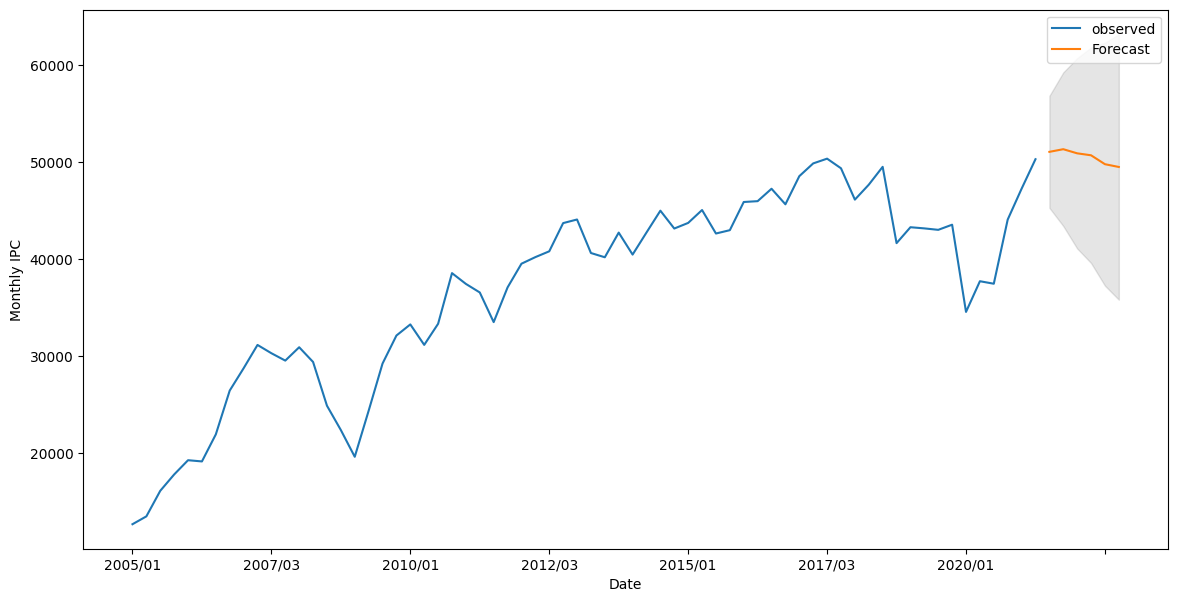

In [ ]:
# Lets estimate a forecast for the next 6 quarters
pred_uc = results.get_forecast(steps=6)

# confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

# display the observed stock prices
ax = ipc.plot(label='observed', figsize=(14, 7))

# display the forecasted stock prices
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

# plot confidence intervals
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.10)
ax.set_xlabel('Date')
ax.set_ylabel('Monthly IPC')

plt.legend()
plt.show()

In [ ]:
# print the forecast of the next 6 quarters
pred_uc = results.get_forecast(steps=6)

# forecasted mean values
predicted_values = pred_uc.predicted_mean
print(predicted_values)

66    51048.115424
67    51320.566094
68    50896.491178
69    50693.433163
70    49776.181851
71    49489.120393
Name: predicted_mean, dtype: float64


# Assigment 4

## a. Background

Mexico IPC: The Consumer Price Index (CPI) is an economic indicator that measures the change in the prices of a basket of goods and services representative of household consumption in a country over a specific period.

México Exchange Rate: It is the value of the MXN compared to the value of the USD, the cost of buying one dollar with a mexican peso.






Exchange rate over time seems to have an upward trend having brief downfalls and slow growth overtime but overall it follows a positive trend

Overall, the exchange rate steadily increased, reflecting the peso's depreciation, while the Mexico IPC rose significantly, indicating growth in the financial markets.

## b. Visualization

**Plot the selected dependent variable (DV) using a time series format.**

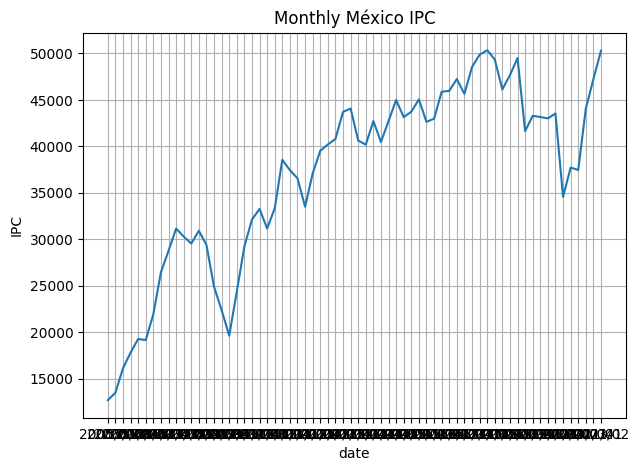

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(ts_data.index, ts_data['mexicp_ipc'])
plt.xlabel('date')
plt.ylabel('IPC')
plt.title('Monthly México IPC')
plt.grid(True)
plt.show()

**Plot the selected explanatory variable (EV) using a time series format**

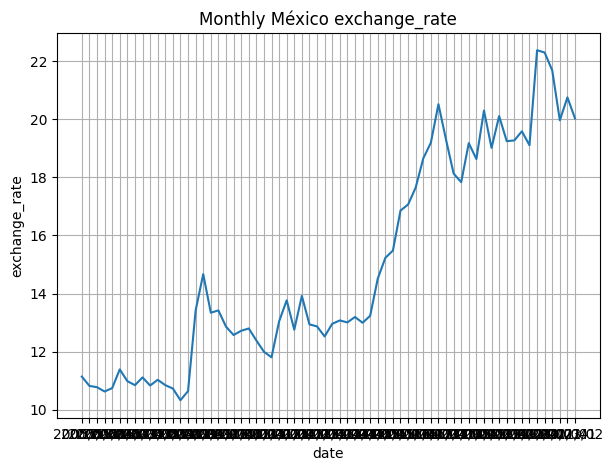

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(ts_data.index, ts_data['exchange_rate'])
plt.xlabel('date')
plt.ylabel('exchange_rate')
plt.title('Monthly México exchange_rate')
plt.grid(True)
plt.show()

**Decompose the selected time series data (both DV and EV) in
observed, trend, seasonality, and random.**

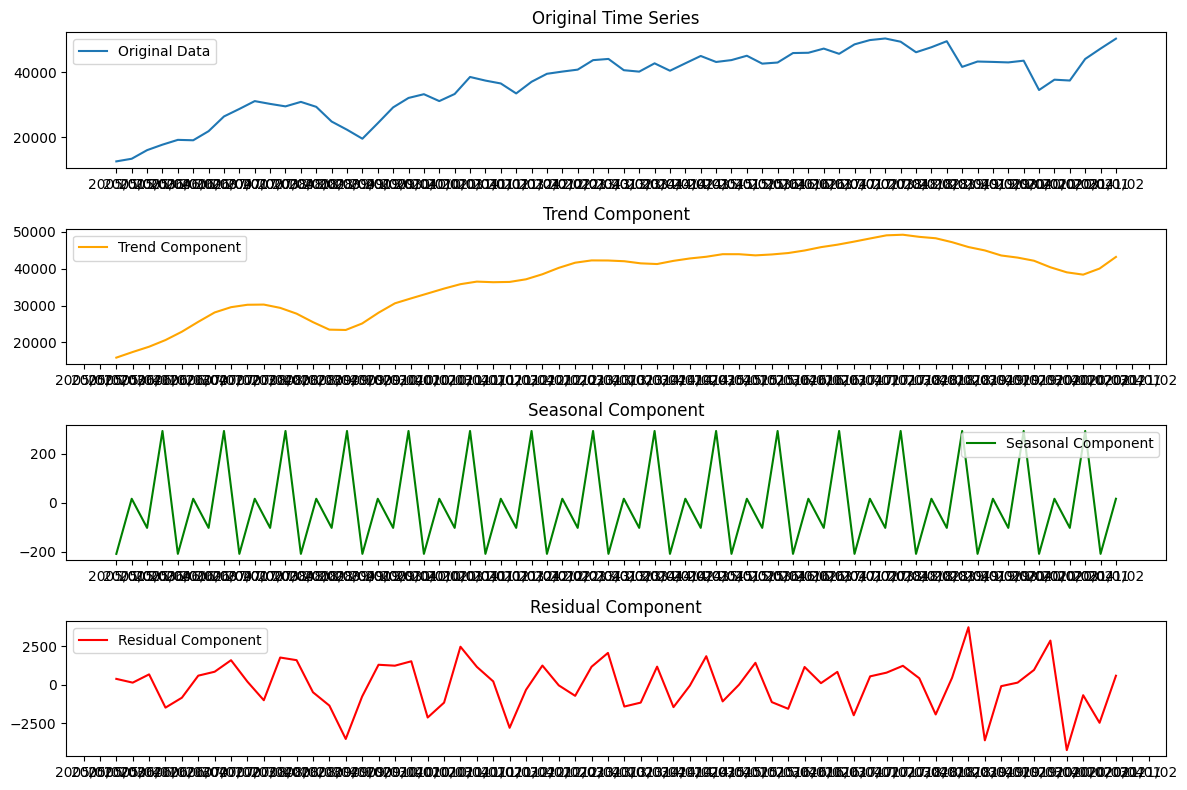

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(ts_dataa['mexicp_ipc'], label='Original Data')
plt.title('Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(ts_decomposition.trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(ts_decomposition.seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(ts_decomposition.resid, label='Residual Component', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

The time series data shows a clear trend and distinct seasonality. Over the years, the seasonal component reveals a noticeable pattern: an initial upward trend is followed by a sharp downward spike. This is succeeded by a second upward trend that exceeds the previous peak, which is then followed by another downward spike. This repeating pattern suggests a consistent cyclical behavior within the data.

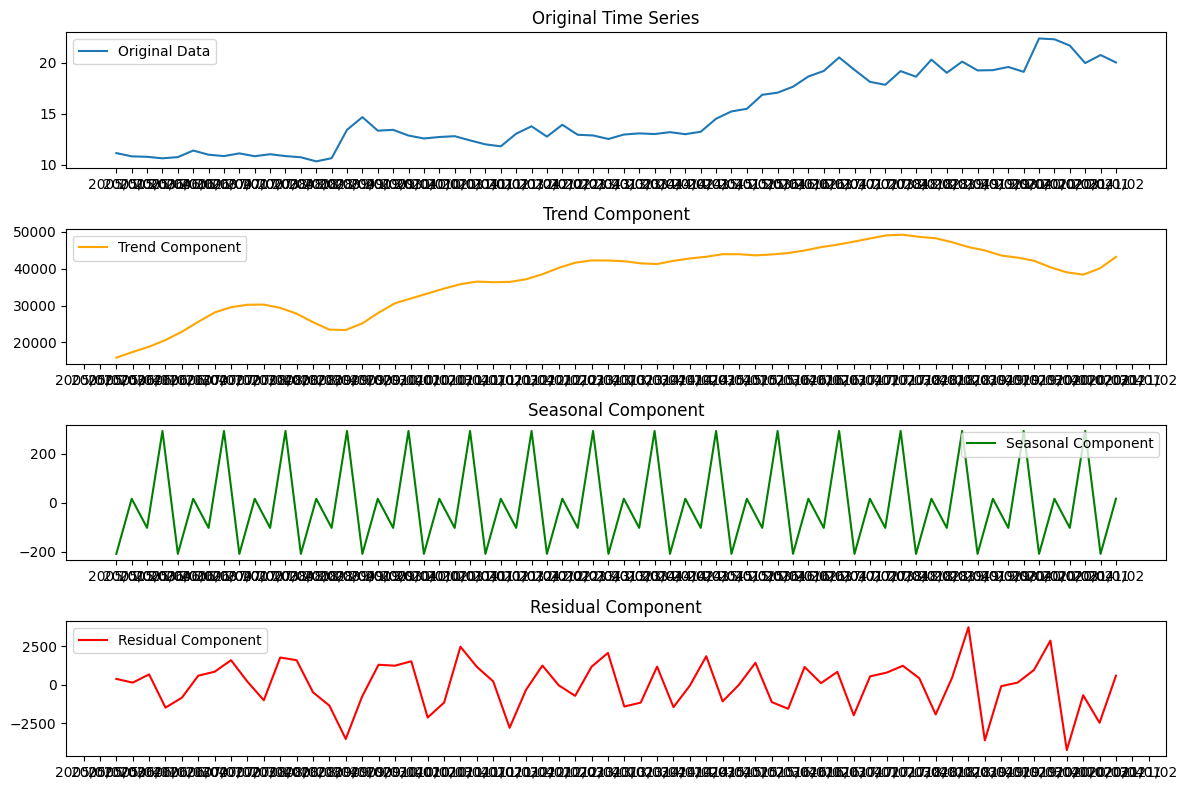

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(ts_dataa['exchange_rate'], label='Original Data')
plt.title('Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(ts_decomposition.trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(ts_decomposition.seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(ts_decomposition.resid, label='Residual Component', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

The time series data shows a clear trend and distinct seasonality. Over the years, the seasonal component reveals a noticeable pattern: an initial upward trend is followed by a sharp downward spike. This is succeeded by a second upward trend that exceeds the previous peak, which is then followed by another downward spike. This repeating pattern suggests a consistent cyclical behavior within the data.

**Both variables show very similar results**


## c. Estimation

***Detect if the selected time series data, both DV and EV, are stationary.***

***Detect if the selected time series data, both DV and EV, show serial
autocorrelation.***

<Figure size 700x500 with 0 Axes>

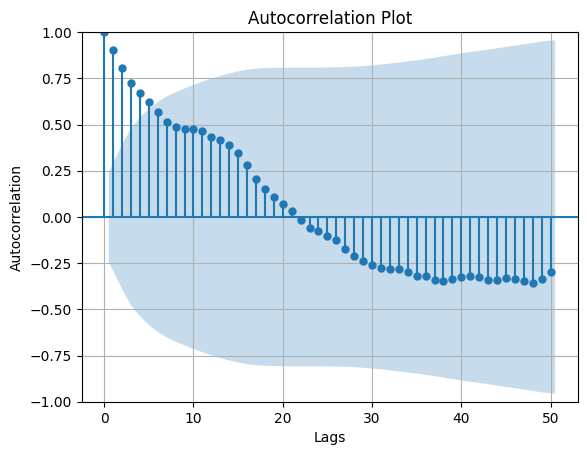

In [ ]:
plt.figure(figsize=(7,5))
plot_acf(ts_data['mexicp_ipc'], lags=50)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.grid(True)
plt.show()

<Figure size 700x500 with 0 Axes>

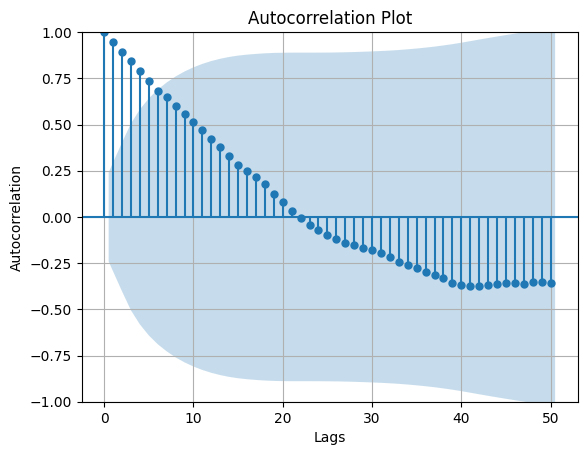

In [ ]:
plt.figure(figsize=(7,5))
plot_acf(ts_data['exchange_rate'], lags=50)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.grid(True)
plt.show()

In [ ]:
log_adf_test = adft(np.log(ts_data['mexicp_ipc']))
print('ADF Statistic: %f' % log_adf_test[0])
print('p-value: %f' % log_adf_test[1])

ADF Statistic: -3.279647
p-value: 0.015813


In [ ]:
log_adf_test = adft(np.log(ts_data['exchange_rate']))
print('ADF Statistic: %f' % log_adf_test[0])
print('p-value: %f' % log_adf_test[1])

ADF Statistic: -0.805196
p-value: 0.817591


In [ ]:
ts_data['log_exchange_rate'] = np.log(ts_data['exchange_rate'])

In [ ]:
ts_data['log_mexicp_ipc'] = np.log(ts_data['mexicp_ipc'])

<Axes: xlabel='date'>

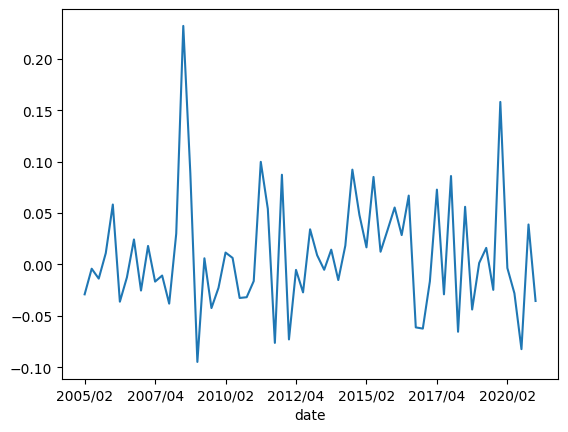

In [ ]:
ts_data['log_diff_exchange_rate'] = ts_data['log_exchange_rate'] - ts_data['log_exchange_rate'].shift(1)
ts_data['log_diff_exchange_rate'].dropna().plot()

In [ ]:
log_diff_adf_test = adft(ts_data["log_diff_exchange_rate"].dropna())
print('ADF Statistic: %f' % log_diff_adf_test[0])
print('p-value: %f' % log_diff_adf_test[1])

ADF Statistic: -8.315581
p-value: 0.000000


Initially, the log of the exchange rate was found to be non-stationary, as indicated by its Augmented Dickey-Fuller (ADF) test statistic of -0.8052 and a p-value of 0.8176. After differencing the series, the ADF test statistic improved significantly to -8.3156 with a p-value of 0.0000, indicating that the differenced series is now stationary. The log IPC series, however, was stationary from the outset with an ADF statistic of -3.2796 and a p-value of 0.0158, confirming its stationarity without further transformations.


***By specifying both DV and EV, estimate a Vector Autoregressive Model
(VAR).***

In [ ]:
var_data = ts_data[['log_diff_mexicp_ipc', 'log_diff_exchange_rate']]
var_data.dropna(inplace=True)

In [ ]:
VAR_model = VAR(var_data)
VAR_results = VAR_model.fit()
print(VAR_results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Sep, 2024
Time:                     03:28:32
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.7050
Nobs:                     64.0000    HQIC:                  -10.8277
Log likelihood:           173.412    FPE:                1.83249e-05
AIC:                     -10.9074    Det(Omega_mle):     1.67206e-05
--------------------------------------------------------------------
Results for equation log_diff_mexicp_ipc
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                             0.012082         0.011618            1.040           0.298
L1.log_diff_mexicp_ipc            0.292608         0.149487            1.957           0.05

The residuals from the Vector Autoregressive (VAR) model show no significant serial autocorrelation. This is confirmed by examining the correlation matrix of residuals, where the correlation between log_diff_mexicp_ipc and log_diff_exchange_rate is -0.5290, indicating some degree of correlation but not significant enough to imply model misspecification or serial autocorrelation issues.

The VAR model was estimated with the differenced series log_diff_mexicp_ipc and log_diff_exchange_rate. The results show that the past values of log_diff_mexicp_ipc have a significant effect on its own future values (coefficient = 0.2926, p-value = 0.050). Conversely, the past values of log_diff_exchange_rate do not significantly impact log_diff_mexicp_ipc (coefficient = 0.2539, p-value = 0.258). For log_diff_exchange_rate, past IPC values have a significant effect (coefficient = -0.1972, p-value = 0.047), but past exchange rate values do not significantly influence future exchange rates (coefficient = -0.2207, p-value = 0.139). The VAR model fit is confirmed as appropriate with no significant residual serial autocorrelation.


***Estimate a Granger Causality Test. Briefly, interpret the estimated results.***

In [ ]:
ts_data.fillna(0, inplace=True)
ts_data.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
print(grangercausalitytests(ts_data[['log_diff_mexicp_ipc', 'log_diff_exchange_rate']], maxlag=2))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2340  , p=0.2709  , df_denom=62, df_num=1
ssr based chi2 test:   chi2=1.2937  , p=0.2554  , df=1
likelihood ratio test: chi2=1.2810  , p=0.2577  , df=1
parameter F test:         F=1.2340  , p=0.2709  , df_denom=62, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1875  , p=0.1212  , df_denom=59, df_num=2
ssr based chi2 test:   chi2=4.7458  , p=0.0932  , df=2
likelihood ratio test: chi2=4.5781  , p=0.1014  , df=2
parameter F test:         F=2.1875  , p=0.1212  , df_denom=59, df_num=2
{1: ({'ssr_ftest': (1.2340276500227982, 0.27091474050268194, 62.0, 1), 'ssr_chi2test': (1.2937386653464822, 0.25536010376882107, 1), 'lrtest': (1.281031920986436, 0.25770725519880683, 1), 'params_ftest': (1.2340276500227991, 0.27091474050268194, 62.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7e86dc2ceb30>, <statsmodels.regression.linear_model.RegressionResu

In [ ]:
 print(grangercausalitytests(ts_data[['log_diff_exchange_rate', 'log_diff_mexicp_ipc']], maxlag=2))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8182  , p=0.0552  , df_denom=62, df_num=1
ssr based chi2 test:   chi2=4.0029  , p=0.0454  , df=1
likelihood ratio test: chi2=3.8845  , p=0.0487  , df=1
parameter F test:         F=3.8182  , p=0.0552  , df_denom=62, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4424  , p=0.0957  , df_denom=59, df_num=2
ssr based chi2 test:   chi2=5.2987  , p=0.0707  , df=2
likelihood ratio test: chi2=5.0908  , p=0.0784  , df=2
parameter F test:         F=2.4424  , p=0.0957  , df_denom=59, df_num=2
{1: ({'ssr_ftest': (3.8181715498038984, 0.05521413544419523, 62.0, 1), 'ssr_chi2test': (4.002921786084732, 0.04542146083919716, 1), 'lrtest': (3.884502604513443, 0.04873369582080685, 1), 'params_ftest': (3.818171549803898, 0.05521413544419523, 62.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7e86de3783a0>, <statsmodels.regression.linear_model.RegressionResult

The Granger Causality tests reveal marginal causality from log_diff_mexicp_ipc to log_diff_exchange_rate with p-values of 0.0552 and 0.0957 for lags 1 and 2, respectively, just above the 5% significance level. This suggests a weak but not conclusive causality. Conversely, the tests also show marginal evidence of causality from log_diff_exchange_rate to log_diff_mexicp_ipc with similar p-values (0.0552 and 0.0957) for the same lags. The F-statistics for these tests are 3.8182 (p = 0.0552) and 2.4424 (p = 0.0957), indicating weak causality in both directions. These results suggest that while there may be some influence between the variables, the evidence is not strong enough to assert a robust causal relationship.

## d. Evaluation

***Based on diagnostic tests and RMSE and / or AIC, compare the 3
estimated time series regression models from Assignment 3 and the
estimated VAR model results, and select the time series model that
better fits the data to estimate the forecast.***

In [ ]:
forecasting_aic = [['ARIMA (5,1,5)', 1117.525], ['ARMA Model (1,4)', -126.084],['ARIMA (1,2,5)', 1104.031],['VAR Model', -10.9306    ]]
forecasting_aic_df = pd.DataFrame(forecasting_aic, columns=['TS Model', 'AIC'])
forecasting_aic_df

,TS Model,AIC
0,"ARIMA (5,1,5)",1117.5250
1,"ARMA Model (1,4)",-126.0840
2,"ARIMA (1,2,5)",1104.0310
3,VAR Model,-10.9306


The VAR model is chosen because its AIC (-10.9306) is closer to zero compared to the other models. While the ARMA (1,4) model has a lower AIC (-126.0840), the VAR model's AIC being nearer to zero suggests a better balance between model complexity and fit, particularly when dealing with multiple time series.

## e. Forecast

***By using the selected model, make a forecast for the next 6 periods. In
doing so, include a time series plot showing your forecast.***

In [ ]:
forecast_steps = 6  # Number of time periods to forecast
forecast = VAR_results.forecast(var_data.values[-VAR_results.k_ar:], steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, columns=var_data.columns)
print(forecast_df)

   log_diff_mexicp_ipc  log_diff_exchange_rate
0             0.021316                0.011361
1             0.021204                0.009106
2             0.020599                0.009626
3             0.020553                0.009631
4             0.020541                0.009639
5             0.020540                0.009639


In [ ]:
fs_last_value = ts_data['mexicp_ipc'].iloc[-1]

# Calculate the cumulative sum of log differences
fs_cumulative_log_diff = np.cumsum(forecast[:, 0])

# Transform cumulative log differences back to original stock price levels
fs_predicted_levels = fs_last_value * np.exp(fs_cumulative_log_diff)

# Convert to DataFrame for better readability
fs_predicted_levels_df = pd.DataFrame(fs_predicted_levels, columns=['Predicted mexicp_ipc'])

print(fs_predicted_levels_df)

   Predicted mexicp_ipc
0          51373.246289
1          52474.191189
2          53566.294855
3          54678.659848
4          55813.452530
5          56971.709895


In [ ]:
# For exchange rate
ex_last_value = ts_data['exchange_rate'].iloc[-1]

# Calculate the cumulative sum of log differences for exchange rate
ex_cumulative_log_diff = np.cumsum(forecast[:, 1])  # Assuming column index 1 is for 'log_diff_exchange_rate'

# Transform cumulative log differences back to original levels
ex_predicted_levels = ex_last_value * np.exp(ex_cumulative_log_diff)

# Convert to DataFrame for better readability
ex_predicted_levels_df = pd.DataFrame(ex_predicted_levels, columns=['Predicted exchange_rate'])

print(ex_predicted_levels_df)


   Predicted exchange_rate
0                20.258955
1                20.444280
2                20.642027
3                20.841784
4                21.043639
5                21.247462


In [ ]:
forecast_dates = pd.date_range(start=ts_data.index[-1], periods=len(fs_predicted_levels) + 1, freq='QS')[1:]
predicted_df = pd.DataFrame({'mexicp_ipc': fs_predicted_levels,'exchange_rate': ex_predicted_levels}, index=forecast_dates)
print(predicted_df)

              mexicp_ipc  exchange_rate
2021-07-01  51373.246289      20.258955
2021-10-01  52474.191189      20.444280
2022-01-01  53566.294855      20.642027
2022-04-01  54678.659848      20.841784
2022-07-01  55813.452530      21.043639
2022-10-01  56971.709895      21.247462


In [ ]:
var_ts_data = ts_data[['mexicp_ipc','exchange_rate']].copy()
var_ts_data = pd.concat([var_ts_data, predicted_df])
# sarima_ts_data.head()

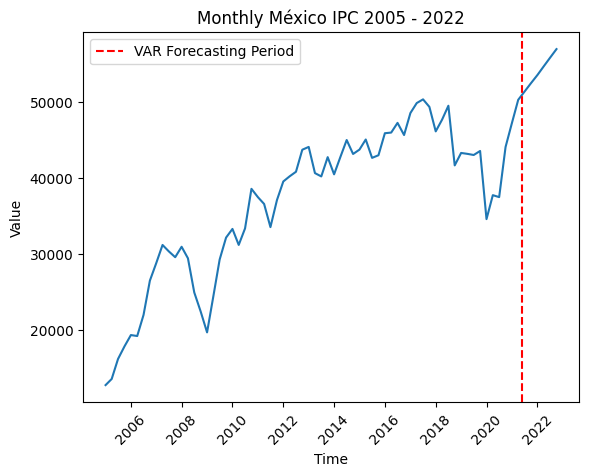

In [ ]:
var_date_range = pd.date_range('2005-01-01', '2022-12-01', freq='BQS')
var_fsp = var_ts_data['mexicp_ipc']
var_data = {'date': var_date_range, 'México IPC': var_fsp}
df_var = pd.DataFrame(var_data)

### Create the time series plot displaying both original data and sarima
### forecasting
plt.plot(df_var['date'], df_var['México IPC'], linestyle = 'solid')
plt.axvline(x=pd.to_datetime('2021-06-01'), color='r', linestyle='--', label='VAR Forecasting Period')
plt.legend()

### Add title and axis labels
plt.title('Monthly México IPC 2005 - 2022')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

### Identify the forecasting time series period from 2021 Q3 to 2022 Q4
# plt.axvline(x=pd.to_datetime('2022-12-01'), color='r', linestyle='--', label='Forecasting Period')
# plt.legend()
# plt.show()

When analyzing the forecast graph for the next 6 periods of the value of the CPI of Mexico, we noticed that we obtained a positive prediction for these periods.


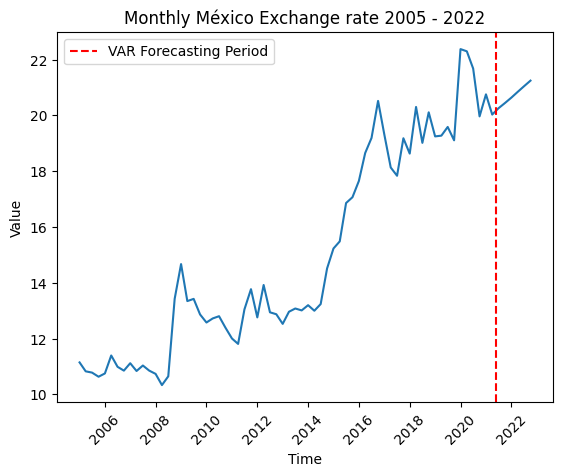

In [ ]:
var_date_range = pd.date_range('2005-01-01', '2022-12-01', freq='BQS')
var_fsp = var_ts_data['exchange_rate']
var_data = {'date': var_date_range, 'México Exchange rate': var_fsp}
df_var = pd.DataFrame(var_data)

### Create the time series plot displaying both original data and sarima
### forecasting
plt.plot(df_var['date'], df_var['México Exchange rate'], linestyle = 'solid')
plt.axvline(x=pd.to_datetime('2021-06-01'), color='r', linestyle='--', label='VAR Forecasting Period')
plt.legend()

### Add title and axis labels
plt.title('Monthly México Exchange rate 2005 - 2022')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


Now, when we made the forecast for the exchange rate of Mexico variable we also obtained a positive prediction for the following six periods.